# Imports and Data Preprocessing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
pd.set_option('Display.max_columns',None)

In [4]:
data = pd.read_csv('Amazon Sales data.csv')
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [10]:
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [14]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [19]:
data['year']  = data['Order Date'].dt.year
data['month'] = data['Order Date'].dt.month

In [42]:
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,year,month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,512878119,2011-09-03,888,109.28,35.84,97040.64,31825.92,65214.72,2011,7
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,2011-12-28,6267,9.33,6.92,58471.11,43367.64,15103.47,2011,11
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,728815257,2016-06-29,1485,154.06,90.93,228779.10,135031.05,93748.05,2016,6
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02,2015,7


In [25]:
monthly_sales = data.groupby(['year', 'month']).agg({'Total Revenue': 'sum'}).reset_index()
monthly_sales

,year,month,Total Revenue
0,2010,2,3410661.12
1,2010,5,2587973.26
2,2010,6,1082418.40
3,2010,10,6064933.75
4,2010,11,3458252.00
5,2010,12,2581786.39
6,2011,1,1042225.35
7,2011,2,387002.20
8,2011,4,2798046.49
9,2011,5,272410.45


# Understanding the trends using graphs

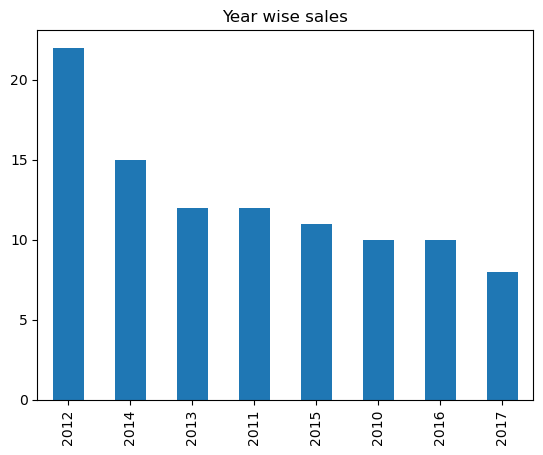

In [52]:
#plotting the yearly sales
year = data['year'].value_counts()
year.plot(kind = 'bar')
plt.title('Year wise sales')
plt.xlabel('')
plt.ylabel('')
plt.show()

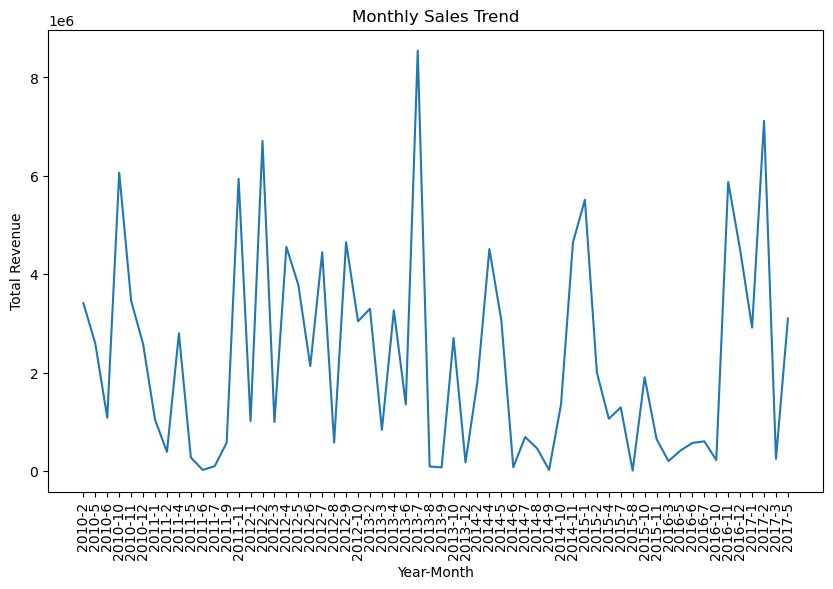

In [36]:
#ploting the monthly sales 
plt.figure(figsize = (10,6))
plt.plot(monthly_sales['year'].astype(str) + '-' + monthly_sales['month'].astype(str), monthly_sales['Total Revenue'])
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=90)
plt.show()

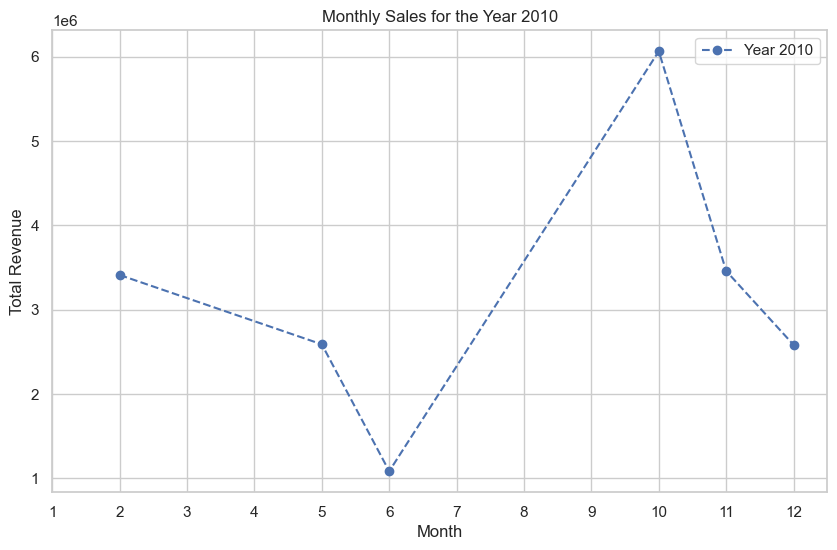

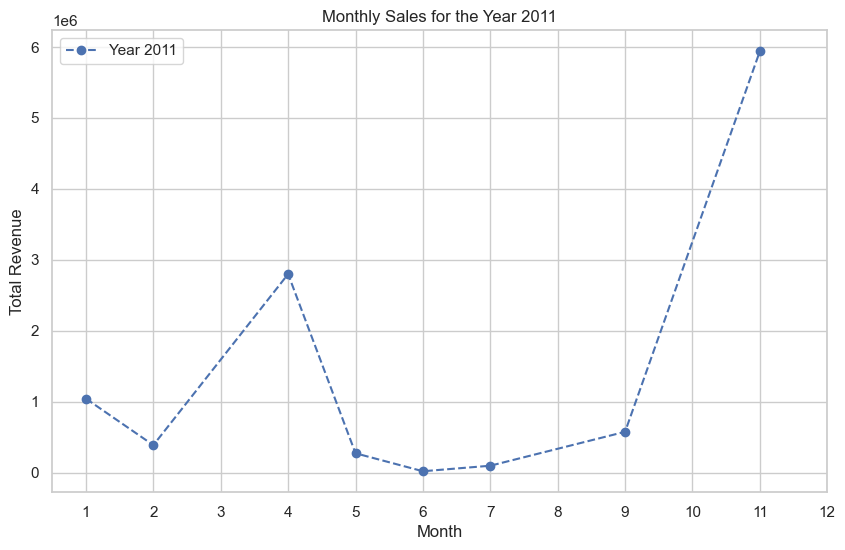

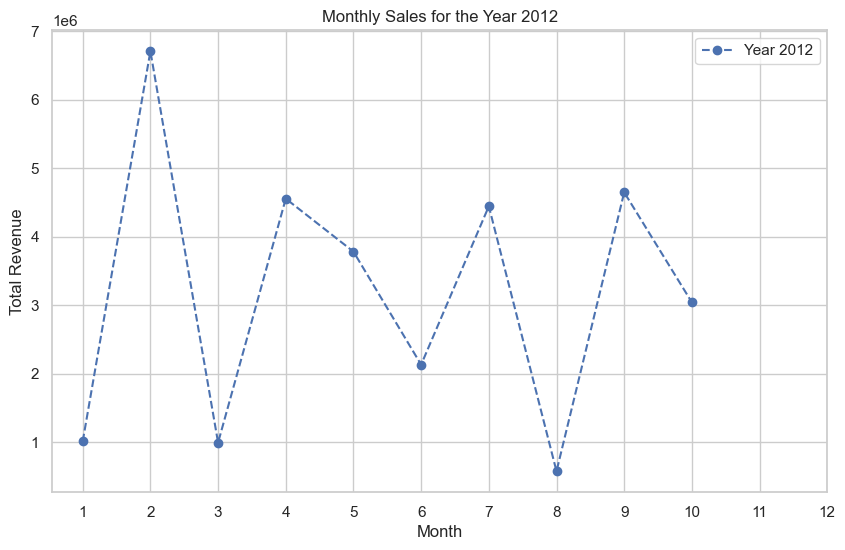

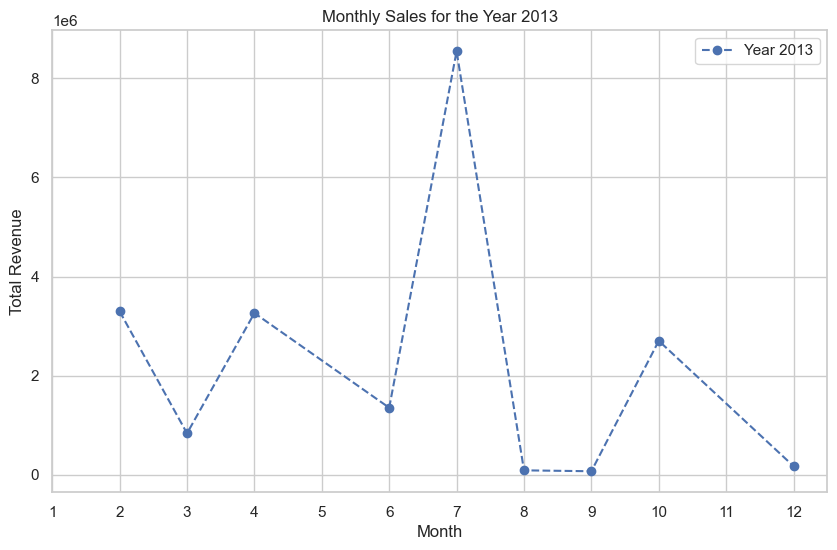

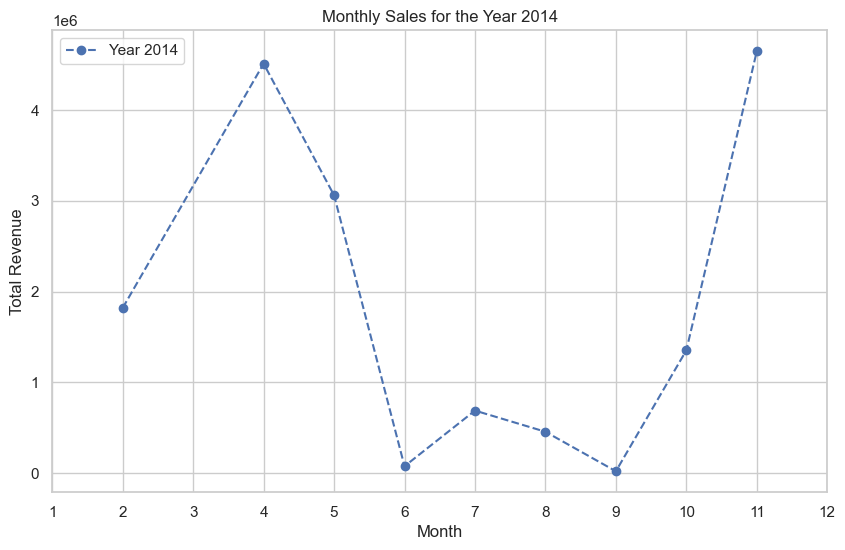

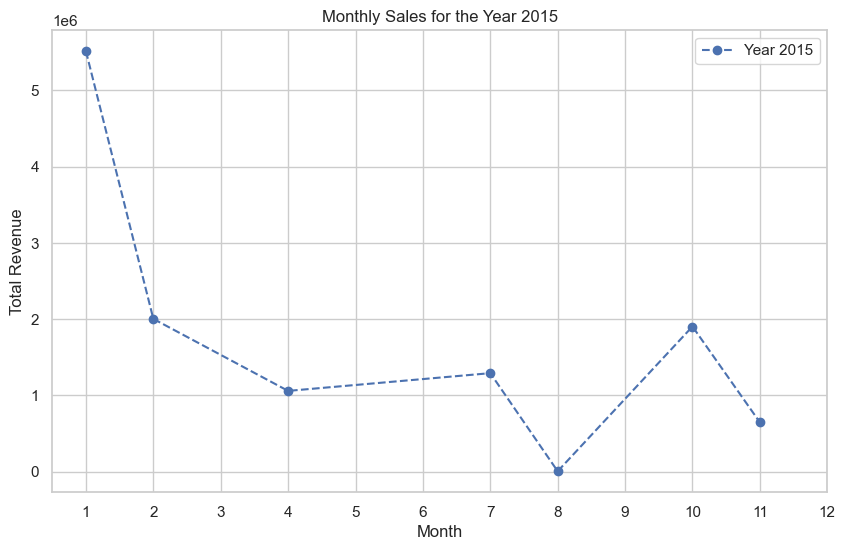

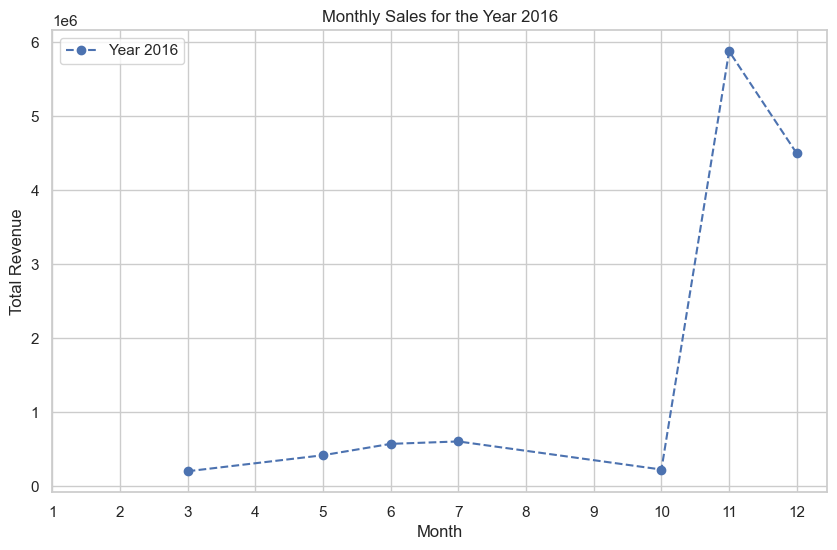

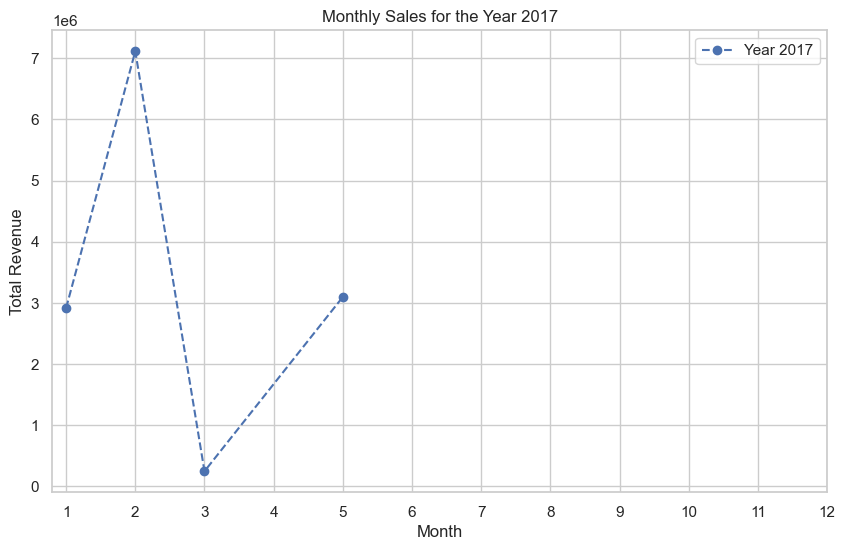

In [80]:
for year in years:
    yearly_data = monthly_sales[monthly_sales['year'] == year]
    plt.figure(figsize=(10, 6))
    plt.plot(yearly_data['month'], yearly_data['Total Revenue'], marker='o', linestyle='--', label=f'Year {year}')
    plt.title(f'Monthly Sales for the Year {year}')
    plt.xlabel('Month')
    plt.ylabel('Total Revenue')
    plt.xticks(range(1, 13))
    plt.legend()
    plt.grid(True)
    plt.show()


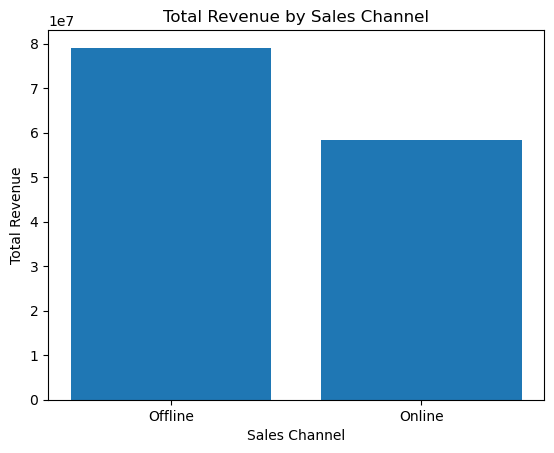

In [70]:
#finding the sales based on online and offline modes
channels = data.groupby('Sales Channel').agg({'Total Revenue': 'sum'}).reset_index()
plt.bar(channels['Sales Channel'], channels['Total Revenue'])
plt.xlabel('Sales Channel')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Sales Channel')
plt.show()




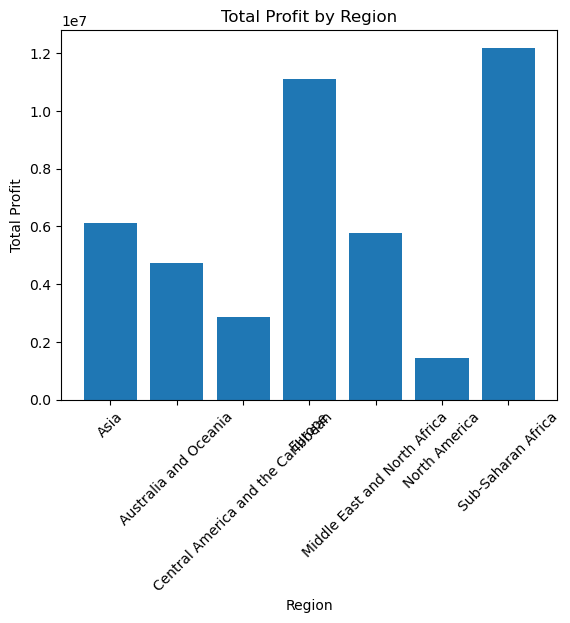

In [72]:
#profit based on region
region_wise_profit = data.groupby('Region').agg({'Total Profit': 'sum'}).reset_index()
plt.bar(region_wise_profit['Region'], region_wise_profit['Total Profit'])
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.title('Total Profit by Region')
plt.xticks(rotation=45)
plt.show()